# TP 3

Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en "Material_TPs/TP3/images" a partir del template "Material_TPs/TP3/template"

In [1]:
# %matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Librerías propias
from utils import template_matching

In [2]:
# Carga de las imágenes

template_img = cv.imread('resources/template/pattern.png',0)
# volver atrás
template_rgb = cv.imread('resources/template/pattern.png')

template_retro_img = cv.imread('resources/template/pattern_retro_1.png',0)

coca_cola_logo_img = cv.imread('resources/images/COCA-COLA-LOGO.jpg')
coca_logo_1_img = cv.imread('resources/images/coca_logo_1.png')
coca_logo_2_img = cv.imread('resources/images/coca_logo_2.png')
coca_retro_1_img = cv.imread('resources/images/coca_retro_1.png')
coca_retro_2_img = cv.imread('resources/images/coca_retro_2.png')
logo_1_img = cv.imread('resources/images/logo_1.png')

coca_multi_img = cv.imread('resources/images/coca_multi.png')

images = [template_rgb, coca_cola_logo_img, coca_logo_1_img, coca_logo_2_img, coca_retro_1_img, coca_retro_2_img, logo_1_img]

1. (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos

In [3]:
#########################################

## NEW TEST - Escenario 1 ##
method = 'cv.TM_CCOEFF_NORMED'
canny_threshold1 = 350
canny_threshold2 = 400
template_matching.template_matching_canning_with_temp_resizing(template_rgb, coca_cola_logo_img, method, canny_threshold1, canny_threshold2)
template_matching.template_matching_canning_with_temp_resizing(template_rgb, coca_logo_1_img, method, canny_threshold1, canny_threshold2)
template_matching.template_matching_canning_with_temp_resizing(template_rgb, coca_retro_1_img, method, canny_threshold1, canny_threshold2)
template_matching.template_matching_canning_with_temp_resizing(template_rgb, coca_retro_2_img, method, canny_threshold1, canny_threshold2)
template_matching.template_matching_canning_with_temp_resizing(template_rgb, logo_1_img, method, canny_threshold1, canny_threshold2)
template_matching.template_matching_canning_with_temp_resizing(template_rgb, coca_logo_2_img, method, canny_threshold1, canny_threshold2) # Not OK


# template_matching.template_matching_canning_with_temp_resizing(template_rgb, coca_retro_2_img, 'cv.TM_CCOEFF', canny_threshold1, canny_threshold2)
# template_matching.template_matching_canning_with_temp_resizing(template_rgb, coca_retro_2_img, 'cv.TM_CCOEFF_NORMED', canny_threshold1, canny_threshold2, debug=True)
# template_matching.template_matching_canning_with_temp_resizing(template_rgb, coca_logo_2_img, 'cv.TM_CCOEFF_NORMED', canny_threshold1, canny_threshold2, debug=True)



## MULTIPLE ###

# template_matching.mult_template_matching_canning_with_temp_resizing(template_rgb, coca_multi_img, 'cv.TM_CCOEFF_NORMED', 1e-6)

# template_matching.template_matching_canning_with_temp_resizing(template_rgb, coca_multi_img, 'cv.TM_CCOEFF', debug = True)

#########################################





## OLD ##
#########

# methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
#                'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
# template_matching.single_match_template(template_retro_img, coca_retro_1_img, methods)

# # template_matching.template_matching_canning_with_resizing(template_retro_img, coca_retro_1_img)
# template_matching.template_matching_canning_with_resizing(template_rgb, coca_cola_logo_img)
# template_matching.template_matching_canning_with_resizing(template_rgb, coca_logo_1_img)
# template_matching.template_matching_canning_with_resizing(template_rgb, coca_logo_2_img)
# template_matching.template_matching_canning_with_resizing(template_rgb, coca_retro_1_img)

# # TODO ARRIBA ALGUNAS SE VAN POR TAMAÑO!!!
# # Falla, porque la imagen es más grande, pero el logo dentro de la imagen es más chico que el template!!!
# template_matching.template_matching_canning_with_resizing(template_rgb, coca_retro_2_img)
# template_matching.template_matching_canning_with_resizing(template_rgb, logo_1_img)



2. (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen coca_multi.png con el mismo témplate del ítem 1

NOTAS:
Para la detección múltiple debemos definir un umbral y es fundamental emplear métodos normalizados.
Como las imágenes no son del mismo tamaño, hay que aplicar un posprocesamiento. Se podría usar Canny para detección de bordes, tanto en el template como en la imagen y hacer template matching a nivel bordes. (muy buena)


Low threshold: 88.5
High threshold: 177.0


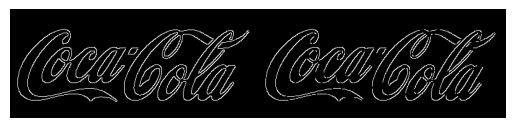

Low threshold: 76.5
High threshold: 153.0


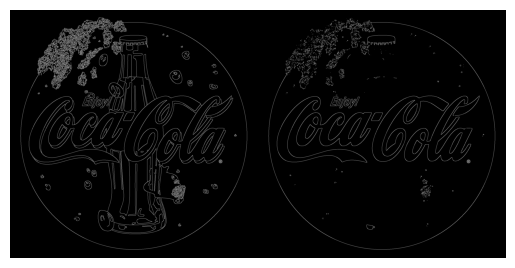

Low threshold: 79.0
High threshold: 158.0


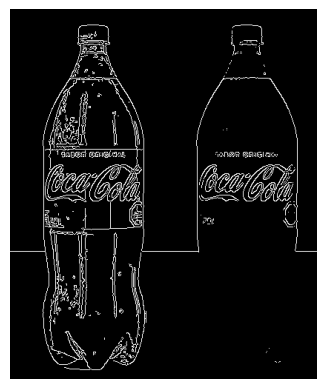

Low threshold: 77.0
High threshold: 154.0


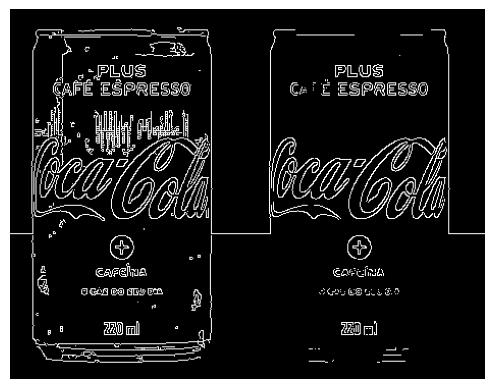

Low threshold: 67.0
High threshold: 134.0


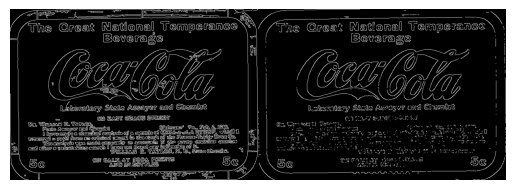

Low threshold: 45.0
High threshold: 90.0


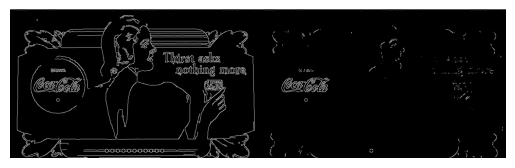

Low threshold: 44.0
High threshold: 88.0


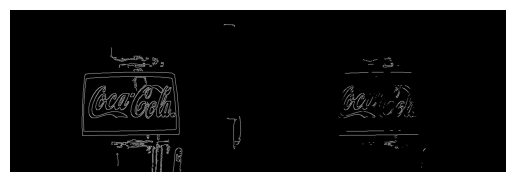

In [4]:
for image in images:

    image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    high_thresh, thresh_im = cv.threshold(image_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    lowThresh = 0.5*high_thresh
    print(f"Low threshold: {lowThresh}")
    print(f"High threshold: {high_thresh}")

    canny_soft = cv.Canny(image_gray, 50, 200)
    canny_heavy = cv.Canny(image_gray, 490, 500)
    concatenated_images = np.hstack((canny_soft, canny_heavy))
    plt.imshow(cv.cvtColor(concatenated_images, cv.COLOR_BGR2RGB))
    plt.axis('off')  # Oculta los ejes
    plt.show()

